<a href="https://colab.research.google.com/github/KhurramRashid6893/Hate-Speech-Detection-using-NLP-and-Machine-Learning/blob/main/Hate_Speech_Detection_using_NLP_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Replace with your file paths
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Project_Love or Hate Speech/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Project_Love or Hate Speech/test.csv")

print(train.head())
print(train['label'].value_counts())


   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
label
0    29720
1     2242
Name: count, dtype: int64


In [5]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)  # Remove URLs
    tweet = re.sub(r'\@\w+|\#','', tweet)  # Remove mentions and hashtags
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)  # Keep only alphabets
    tweet_tokens = tweet.split()
    filtered_words = [stemmer.stem(word) for word in tweet_tokens if word not in stop_words]
    return ' '.join(filtered_words)

train['clean_tweet'] = train['tweet'].apply(clean_tweet)


Feature Extraction with TF-IDF

In [6]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train['clean_tweet'])
y = train['label']


In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [8]:
y_pred = model.predict(X_valid)

print("Accuracy:", accuracy_score(y_valid, y_pred))
print("\nClassification Report:\n", classification_report(y_valid, y_pred))


Accuracy: 0.9508837791334271

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.35      0.50       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393



In [9]:
test['clean_tweet'] = test['tweet'].apply(clean_tweet)
X_test = vectorizer.transform(test['clean_tweet'])
test['label'] = model.predict(X_test)
test[['id', 'label']].to_csv("submission.csv", index=False)


In [12]:
# Define ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train, predict, and compare models
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    accuracy_scores[name] = acc
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_valid, y_pred))




Model: Logistic Regression
Accuracy: 0.9509
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.35      0.50       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393


Model: Naive Bayes
Accuracy: 0.9507
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.93      0.34      0.49       456

    accuracy                           0.95      6393
   macro avg       0.94      0.67      0.73      6393
weighted avg       0.95      0.95      0.94      6393


Model: Linear SVM
Accuracy: 0.9592
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5937
           1       0.80      0.57      0.66       456

    accuracy                           0.96      6393
   macro a

In [15]:
!pip install ace_tools

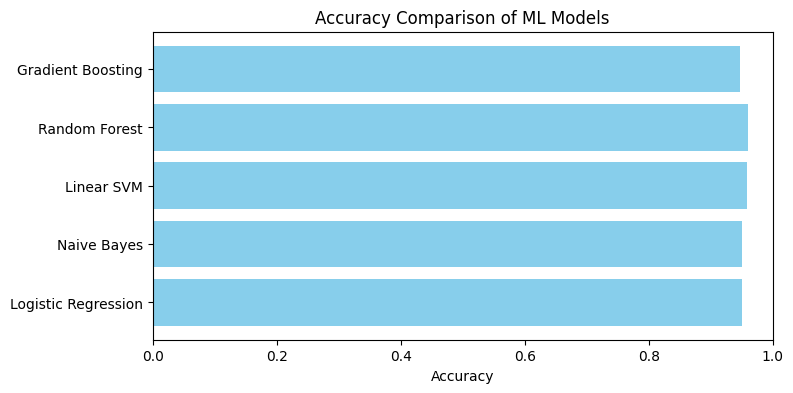


=== Model Accuracy Comparison ===
                 Model  Accuracy
3        Random Forest  0.959643
2           Linear SVM  0.959174
0  Logistic Regression  0.950884
1          Naive Bayes  0.950727
4    Gradient Boosting  0.947286


In [22]:
# Display accuracy comparison visually
plt.figure(figsize=(8, 4))
plt.barh(list(accuracy_scores.keys()), list(accuracy_scores.values()), color='skyblue')
plt.title("Accuracy Comparison of ML Models")
plt.xlabel("Accuracy")
plt.xlim(0, 1)
plt.show()

# Show DataFrame of accuracies
acc_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print("\n=== Model Accuracy Comparison ===")
print(acc_df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


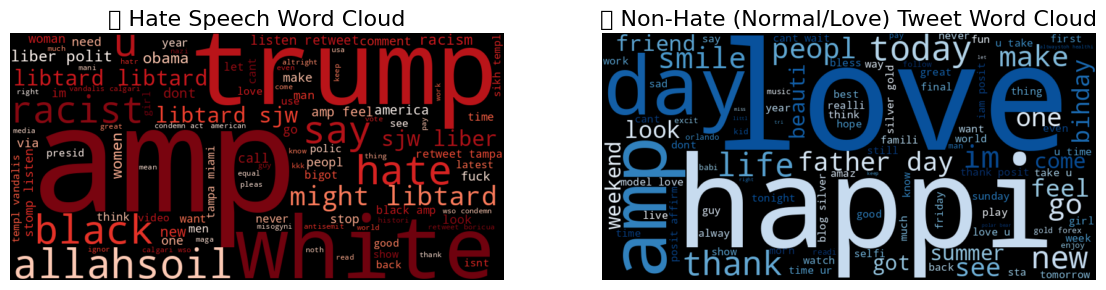

In [24]:
# --- Import Required Libraries ---
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- Download stopwords if not available ---
nltk.download('stopwords')

# --- Load Dataset ---
train = train

# --- Text Cleaning Function ---
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)  # remove URLs
    tweet = re.sub(r'\@\w+|\#', '', tweet)  # remove mentions and hashtags
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)  # keep only letters
    tokens = tweet.split()
    filtered = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered)

# --- Apply Cleaning ---
train['clean_tweet'] = train['tweet'].apply(clean_tweet)

# --- Separate Hate and Non-Hate Tweets ---
hate_tweets = train[train['label'] == 1]['clean_tweet']
non_hate_tweets = train[train['label'] == 0]['clean_tweet']

# --- Combine all words into a single string ---
hate_words = ' '.join(hate_tweets)
non_hate_words = ' '.join(non_hate_tweets)

# --- Generate Word Clouds ---
plt.figure(figsize=(14, 6))

# Hate Speech Word Cloud
plt.subplot(1, 2, 1)
wc_hate = WordCloud(width=800, height=400, background_color='black', colormap='Reds', max_words=100).generate(hate_words)
plt.imshow(wc_hate, interpolation='bilinear')
plt.title("🔥 Hate Speech Word Cloud", fontsize=16)
plt.axis('off')

# Non-Hate (Love/Normal) Word Cloud
plt.subplot(1, 2, 2)
wc_non_hate = WordCloud(width=800, height=400, background_color='black', colormap='Blues', max_words=100).generate(non_hate_words)
plt.imshow(wc_non_hate, interpolation='bilinear')
plt.title("💙 Non-Hate (Normal/Love) Tweet Word Cloud", fontsize=16)
plt.axis('off')

plt.show()
